In [1]:
import pandas as pd
from funtions import *

In [2]:
df = pd.read_csv("./Dataset/5.2.df_clean_target.csv")

In [5]:
df

,Week,SalesUnitWeek,SalesPesosWeek,ReturnsUnitNextWeek,RetrunsPesosNestWeek,AjustedDemand,Latitude,Longitude,typeClient,desc,g,brand,Ruta_SAK_counts,target
0,5,60,270.00,0,0.0,60,21.122129,-101.60347,Small Franchise,Nito,62.0,BIM,2008,1
1,8,20,90.00,0,0.0,20,21.122129,-101.60347,Individual,Nito,62.0,BIM,2008,1
2,6,10,45.00,0,0.0,10,21.122129,-101.60347,NO IDENTIFICADO,Nito,62.0,BIM,2008,1
3,7,25,112.50,0,0.0,25,21.122129,-101.60347,Small Franchise,Nito,62.0,BIM,2008,1
4,9,23,103.50,0,0.0,23,21.122129,-101.60347,Small Franchise,Nito,62.0,BIM,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964343,5,60,1062.60,0,0.0,60,18.994450,-98.19185,Supermarket,Tostada Briobalance,240.0,SAN,1,1
964344,8,192,14962.56,0,0.0,192,25.767190,-108.99228,Walmart,Principe Mix,1724.0,MLA,1,1
964345,8,192,14213.76,0,0.0,192,19.432680,-99.13421,Walmart,Principe Mix,1724.0,MLA,1,1
964346,8,245,12078.50,0,0.0,245,19.432680,-99.13421,Walmart,BranFrut Fresa,NaN,BIM,1,1


In [6]:
df.Week

0         5
1         8
2         6
3         7
4         9
         ..
964343    5
964344    8
964345    8
964346    8
964347    7
Name: Week, Length: 964348, dtype: int64

In [71]:
ruta = pd.DataFrame(df["Ruta_SAK_counts"].unique(), columns=["Ruta_SAK_counts"])

In [132]:
ruta.describe()

,Ruta_SAK_counts
count,841.000000
mean,970.482759
std,1039.387878
min,1.000000
25%,228.000000
50%,598.000000
75%,1385.000000
max,6021.000000


In [72]:
ruta[ruta["Ruta_SAK_counts"]>970].size

301

In [73]:
ruta["salesDepot"] = ruta["Ruta_SAK_counts"].apply(lambda x: 1 if x>1200 else 0)

In [74]:
df = pd.merge(df, ruta, on="Ruta_SAK_counts")

# Week End

In [138]:
df["Week"].unique()

array([5, 8, 6, 7, 9, 4, 3], dtype=int64)

</br>3 - thursday
</br>9 - wendnesday
</br>
</br>7-9 => 0-2 (Monday-Wendnesday)

In [75]:
df["Week"] = df["Week"].replace([7, 8, 9], [0,1,2])

In [27]:
df["Week"].unique()

array([5, 1, 6, 0, 2, 4, 3], dtype=int64)

In [28]:
resume(df)

Dataset Shape: (964348, 15)


,Name,dtypes,Uniques,Duplicated,First Value,Second Value,Max,Min,Null,Entropy
0,Week,int64,7,964341,5,1,6,0,0,2.81
1,SalesUnitWeek,int64,614,963734,60,20,5000,0,0,3.86
2,SalesPesosWeek,float64,13671,950677,270.0,90.0,50353.22,0.0,0,9.36
3,ReturnsUnitNextWeek,int64,134,964214,0,0,1241,0,0,0.31
4,RetrunsPesosNestWeek,float64,2515,961833,0.0,0.0,49500.0,0.0,0,0.50
5,AjustedDemand,int64,613,963735,60,20,5000,0,0,3.91
6,Latitude,float64,257,964091,21.122129,21.122129,32.60554,14.91107,0,7.67
7,Longitude,float64,257,964091,-101.60347,-101.60347,-86.82003,-117.12303,0,7.67
8,typeClient,object,18,964330,Small Franchise,Individual,Walmart Store,Bimbo Store,0,2.33
9,desc,object,531,963817,Nito,Nito,pct Whole Wheat,Granos,0,6.42


# Corr Matrix

In [29]:
corr_matrix = df.corr()
corr_matrix["AjustedDemand"].sort_values(ascending=False)

AjustedDemand           1.000000
SalesUnitWeek           0.996357
SalesPesosWeek          0.792039
target                  0.265031
ReturnsUnitNextWeek     0.043717
RetrunsPesosNestWeek    0.025588
Latitude                0.011582
g                       0.001343
Week                   -0.001500
Longitude              -0.003175
salesDepot             -0.076361
Ruta_SAK_counts        -0.082319
Name: AjustedDemand, dtype: float64

In [30]:

corr_matrix["target"].sort_values(ascending=False)

target                  1.000000
AjustedDemand           0.265031
SalesUnitWeek           0.262159
SalesPesosWeek          0.172192
Latitude                0.020015
Week                    0.001347
RetrunsPesosNestWeek   -0.007559
Longitude              -0.010470
ReturnsUnitNextWeek    -0.018341
salesDepot             -0.068755
Ruta_SAK_counts        -0.088658
g                      -0.106496
Name: target, dtype: float64

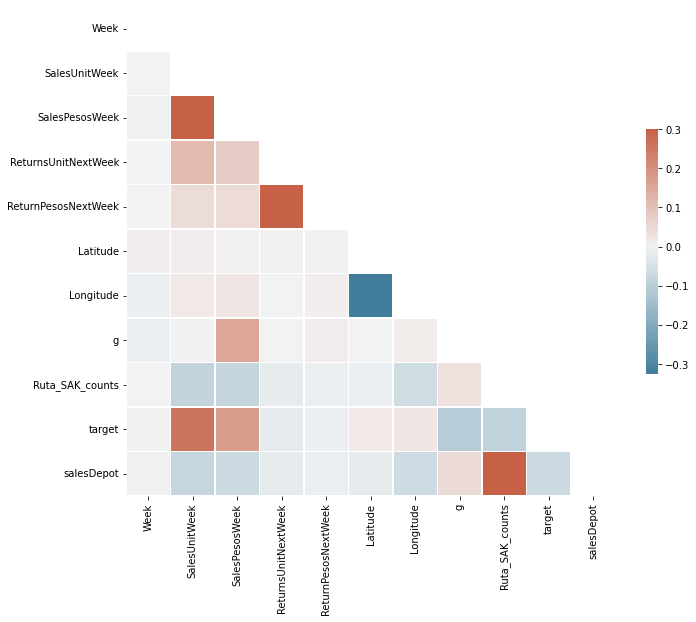

In [69]:
corr_matrix = df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Map

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

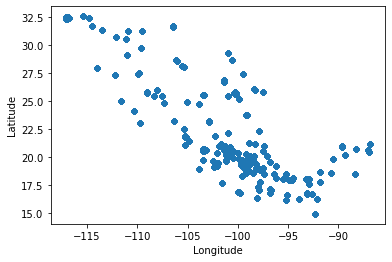

In [31]:
df.plot(kind="scatter", x="Longitude", y="Latitude")

In [32]:
df['SalesUnitWeek_log10'] = df['SalesUnitWeek'].apply(lambda x: 0 if x==0 else np.log10(x))

In [41]:
df['AjustedDemand_log10'] = df['AjustedDemand'].apply(lambda x: 0 if x==0 else np.log10(x))

In [39]:
df['AjustedDemand_log2'] = df['AjustedDemand'].apply(lambda x: 0 if x==0 else np.log2(x))

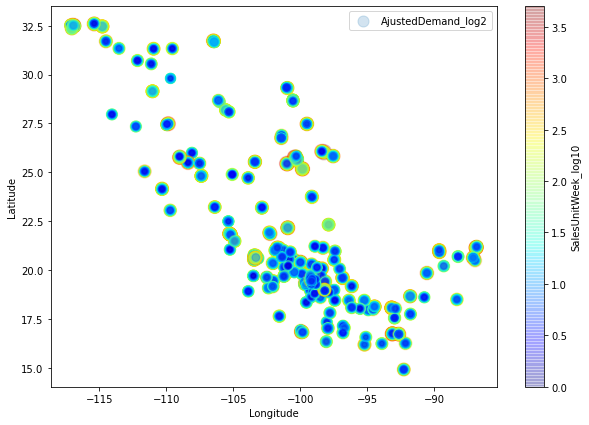

In [35]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.2,
             s=df["AjustedDemand_log2"]*20, label="AjustedDemand_log2", figsize=(10,7),
             c="SalesUnitWeek_log10", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()

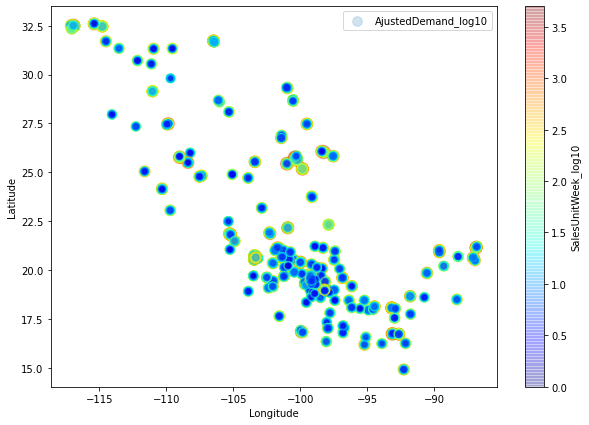

In [155]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
             s=df["AjustedDemand_log10"]*50, label="AjustedDemand_log10", figsize=(10,7),
             c="SalesUnitWeek_log10", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()

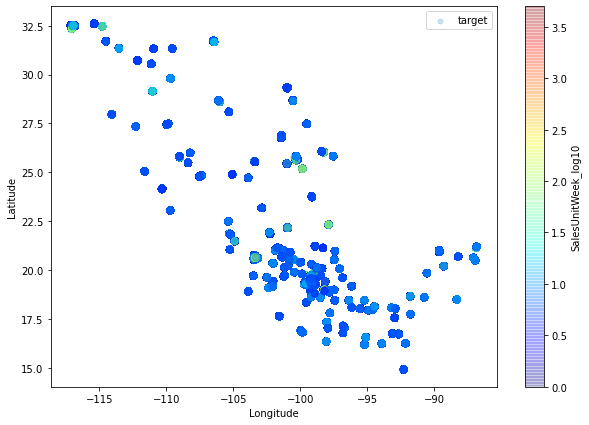

In [150]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.2,
             s=df["target"]*50, label="target", figsize=(10,7),
             c="SalesUnitWeek_log10", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()

In [40]:
df.columns

Index(['Week', 'SalesUnitWeek', 'SalesPesosWeek', 'ReturnsUnitNextWeek',
       'RetrunsPesosNestWeek', 'AjustedDemand', 'Latitude', 'Longitude',
       'typeClient', 'desc', 'g', 'brand', 'Ruta_SAK_counts', 'target',
       'salesDepot', 'SalesUnitWeek_log10', 'AjustedDemand_log2'],
      dtype='object')

In [42]:
columns = ["AjustedDemand_log2", "AjustedDemand_log10", "SalesUnitWeek_log10", "AjustedDemand"]
df.drop(columns, axis=1, inplace=True)


# Save Dataset

In [76]:
df1 = pd.read_csv("./Dataset/3.2.address_filtered.csv")

In [77]:
df = pd.merge(df,df1,on="Latitude",how="inner")

In [79]:
df.drop(["Longitude_y"], axis=1, inplace=True)

In [84]:
df.rename(columns={"Longitude_x":"Longitude"}, inplace=True)

In [85]:

df.columns

Index(['Week', 'SalesUnitWeek', 'SalesPesosWeek', 'ReturnsUnitNextWeek',
       'RetrunsPesosNestWeek', 'AjustedDemand', 'Latitude', 'Longitude',
       'typeClient', 'desc', 'g', 'brand', 'Ruta_SAK_counts', 'target',
       'salesDepot', 'Address'],
      dtype='object')

In [86]:
resume(df)

Dataset Shape: (964348, 16)


,Name,dtypes,Uniques,Duplicated,First Value,Second Value,Max,Min,Null,Entropy
0,Week,int64,7,964341,5,1,6,0,0,2.81
1,SalesUnitWeek,int64,614,963734,60,20,5000,0,0,3.86
2,SalesPesosWeek,float64,13671,950677,270.0,90.0,50353.22,0.0,0,9.36
3,ReturnsUnitNextWeek,int64,134,964214,0,0,1241,0,0,0.31
4,RetrunsPesosNestWeek,float64,2515,961833,0.0,0.0,49500.0,0.0,0,0.50
5,AjustedDemand,int64,613,963735,60,20,5000,0,0,3.91
6,Latitude,float64,257,964091,21.122129,21.122129,32.60554,14.91107,0,7.67
7,Longitude,float64,257,964091,-101.60347,-101.60347,-86.82003,-117.12303,0,7.67
8,typeClient,object,18,964330,Small Franchise,Individual,Walmart Store,Bimbo Store,0,2.33
9,desc,object,531,963817,Nito,Nito,pct Whole Wheat,Granos,0,6.42


In [87]:
df.to_csv("./Dataset/6.final_df.csv", index=False)

In [88]:
df["Address"].unique().size

257

Dataset Shape: (935362, 2)
Saving table client
Saving figure Cliente_ID
Saving figure NombreCliente


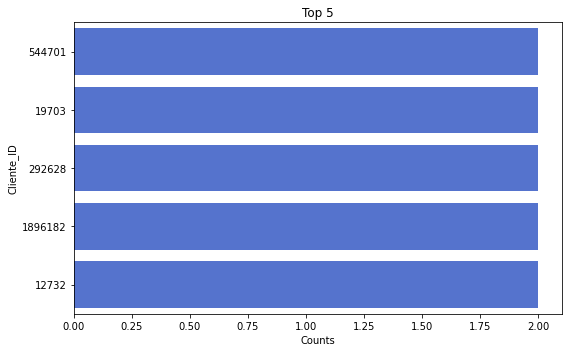

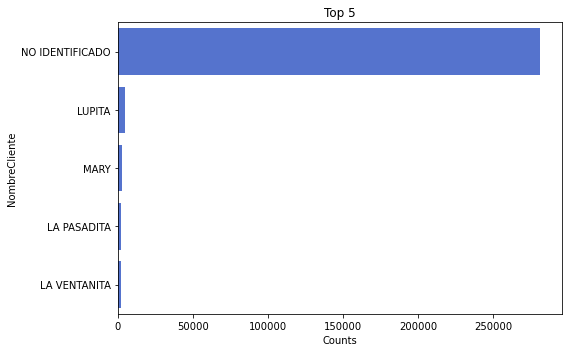

In [17]:
save_all_countplot(df, "client")

# Obter a tabela

In [3]:
a = resume(df)

Dataset Shape: (964348, 11)


In [4]:
dfi.export(a, 'df_styled.png')

# Obter as diretorias para os ficheiros

In [16]:
columns = df.columns
for column in columns:
    print(column)

Semana
Agencia_ID
Canal_ID
Ruta_SAK
Cliente_ID
Producto_ID
Venta_uni_hoy
Venta_hoy
Dev_uni_proxima
Dev_proxima
Demanda_uni_equil


In [ ]:
def countplot(df, color="royalblue"):
    plt.figure(figsize=(8,5))
    g = sns.barplot(y=df.iloc[:,0], x=df.iloc[:,1], orient="h", color=color)
    plt.title("Top 5")

In [ ]:
def save_all_countplot(df, TABLE_ID, tight_layout=True, fig_extension="png", resolution=300): 
    PROJECT_ROOT_DIR = "."
    IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", TABLE_ID)
    os.makedirs(IMAGES_PATH, exist_ok=True)
    
    table_df = resume(df)
    print("Saving table", TABLE_ID)
    dfi.export(table_df, TABLE_ID + '_table.' + fig_extension)
    
    columns = df.columns
    for column in columns:
        df_column = df[column].value_counts().rename_axis(column).reset_index(name='Counts').iloc[:5]
        countplot(df_column)
        
        
        path = os.path.join(IMAGES_PATH, column + "_count." + fig_extension)
        print("Saving figure", column)
        if tight_layout:
            plt.tight_layout()
        plt.savefig(path, format=fig_extension, dpi=resolution)
    
# PROJECT_ROOT_DIR = "."
# CHAPTER_ID = "end_to_end_project"
# IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# os.makedirs(IMAGES_PATH, exist_ok=True)

# def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#     path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
#     print("Saving figure", fig_id)
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format=fig_extension, dpi=resolution)

In [17]:
test = df["Semana"].value_counts().rename_axis('Semana').reset_index(name='Counts').iloc[:5]

In [18]:
test

,Semana,Counts
0,3,144941
1,4,143700
2,5,137738
3,8,135380
4,9,135114


0    144941
1    143700
2    137738
3    135380
4    135114
Name: Counts, dtype: int64

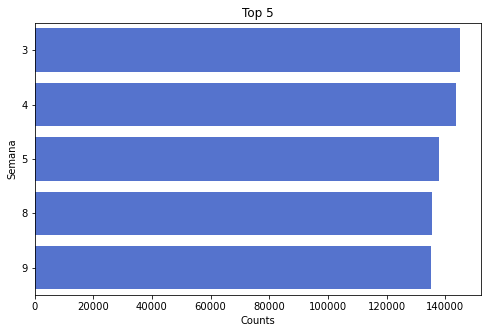

In [22]:

plt.figure(figsize=(8,5))
g = sns.barplot(y=test.iloc[:,0], x=test.iloc[:,1], orient="h", color="royalblue")
plt.title("Top 5")
plt.show()


In [10]:
df.columns

Index(['Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID',
       'Producto_ID', 'Venta_uni_hoy', 'Venta_hoy', 'Dev_uni_proxima',
       'Dev_proxima', 'Demanda_uni_equil'],
      dtype='object')

In [4]:
df.Cliente_ID.max()

2015152015

In [11]:
df.Cliente_ID.min()

0

In [15]:
df["Cliente_ID"].duplicated().sum()

4862

In [14]:
df["Cliente_ID"].isna().sum()

Cliente_ID       0
NombreCliente    0
dtype: int64

In [16]:
df["Cliente_ID"].nunique()

930500